In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Очень надеюсь, что Илья Юрьевич не обидется, что я полностью удалил весь его код и блок теории

# Задания #

Далее идет 5 заданий:

* Оценка 5 ставится за 4 задания.
* Оценка 4 ставится за 3 задания.
* Оценка 3 ставится за 2 задания.

## Задание 1

1) Как связаны определитель исходной и обратной матрицы?

det(A) * det(A^(-1)) = 1

2) Сформулируйте критерий, когда обратная матрица существует в зависимости от значения ее определителя?

 A^(-1) does not exist if det(A) == 0

## Задание 2


Для трех точек $P_1=(x_1, y_1)$, $P_2=(x_2, y_2)$ и $P_3=(x_3, y_3)$ постройте и нарисуйте прямые, которые проходят через каждую пару точек. Известно, что все $y_i$ различны.

[[-1.  1.]
 [ 2.  1.]]
[-2  3]
[ 1.66666667 -0.33333333]
[[ 2.  1.]
 [-4.  1.]]
[3 6]
[-0.5  4. ]
[[-4.  1.]
 [-1.  1.]]
[ 6 -2]
[-2.66666667 -4.66666667]


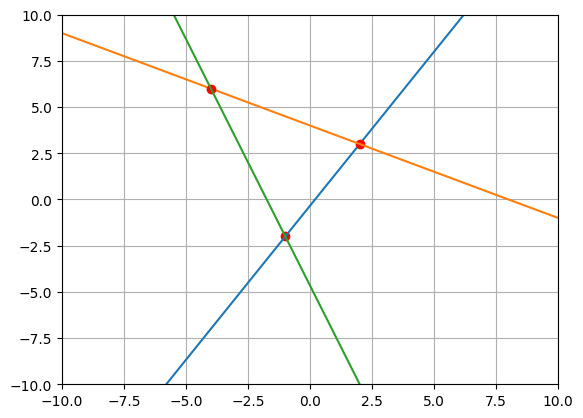

In [6]:

plt.axis([-10, 10, -10, 10]) # Устанавливаем масштабы осей
plt.grid(True) # Отображаем сетку

def line_by_points(P1, P2):
    X = np.array([P1[0],P2[0]])
    Y = np.array([P1[1],P2[1]])
    A = np.vstack([X, np.ones(2)]).T # Склейка матриц
    print(A, Y, sep = '\n')
    
    K = np.linalg.solve(A,Y) 
    #K = np.linalg.inv(A).dot(Y) # В явном виде через обрантую матрицу
    # Замечание: Формально Y в обоих вариантах должен быть столбцом, а не строкой, но функции и так работают правильно.
    
    return K

def plot_line(P1, P2):
    K = line_by_points(P1,P2)
    print(K)
    x = np.linspace(-10,10) # Множество значений от -5 до +5 (с шагом 50 по умолчанию)
    y = K[0]*x + K[1]
    plt.plot(x,y) # Строим график прямой


Points = [[-1, -2], [2, 3], [-4, 6]]
for i in range(3):
    plt.plot(*Points[i], 'ro')
    plot_line(Points[i], Points[(i+1)%3])

## Задание 3

Для трех прямых $y = k_1x + l_1$, $y = k_2x + l_2$ и $y = k_3x + l_3$ необходимо найти все точки их пересечения, нарисовать прямые и точки. Известно, что прямые любые две прямые не параллельны

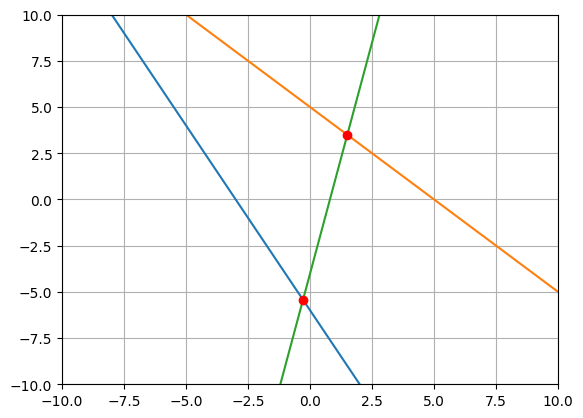

In [16]:
plt.axis([-10, 10, -10, 10])
plt.grid(True)

def point_by_lines(R1, R2):
    K = np.array([R1[0],R2[0]])
    L = np.array([R1[1],R2[1]])
    A = np.vstack([K,-np.ones(2)]).T
    D = np.linalg.solve(A,-L)
    return D

lines = [[-2, -6], [-1, 5], [5, -4]]
x = np.linspace(-10,10)
for el in lines:
    plt.plot(x, el[0]*x + el[1])
    
for i in range(len(lines)):
    plt.plot(*point_by_lines(lines[i], lines[(i+1)%3]), 'ro')


## Задание 4

1. Определение, при каких $n$ ($3 \leq n \leq 30$) данная система имеет решение. Указание: Если правая часть системы ненулевая, 
    т.е. не состоит из одних 0 (как в данном случае), то система имеет решение тогда и только тогда, 
    когда определитель матрицы не равен нулю.
2. Для максимального $n$, при котором система имеет решение, найдите решение и отобразите их на плоском графике как множество точек $(i, x_i)$
3. Проанализируйте график и запишите множество решений в виде явной формулы.

In [21]:
for n in range(3, 31):
    A = np.zeros((n, n))
    k = np.zeros(n)
    
    for i in range(n):
        A[i][(i+1)%n] = 1
        A[i][i%n] = 1
        k[i] = i+1
    det_A = np.linalg.det(A)
    if det_A != 0:
        print("Для n = ", n, " система имеет решение.")
    else:
        print("Для n = ", n, " система не имеет решения.")

[[1. 1. 0.]
 [0. 1. 1.]
 [1. 0. 1.]] [1. 2. 3.]
Для n =  3  система имеет решение.
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]] [1. 2. 3. 4.]
Для n =  4  система не имеет решения.
[[1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1.]] [1. 2. 3. 4. 5.]
Для n =  5  система имеет решение.
[[1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1.]] [1. 2. 3. 4. 5. 6.]
Для n =  6  система не имеет решения.
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1.]] [1. 2. 3. 4. 5. 6. 7.]
Для n =  7  система имеет решение.
[[1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]] [1. 2. 3. 4. 5. 6. 7. 8.]
Для n 

1 7
2 -6
3 8
4 -5
5 9
6 -4
7 10
8 -3
9 11
10 -2
11 12
12 -1
13 13
14 0
15 14
16 0
17 15
18 1
19 16
20 2
21 17
22 3
23 18
24 4
25 19
26 5
27 20
28 6
29 21


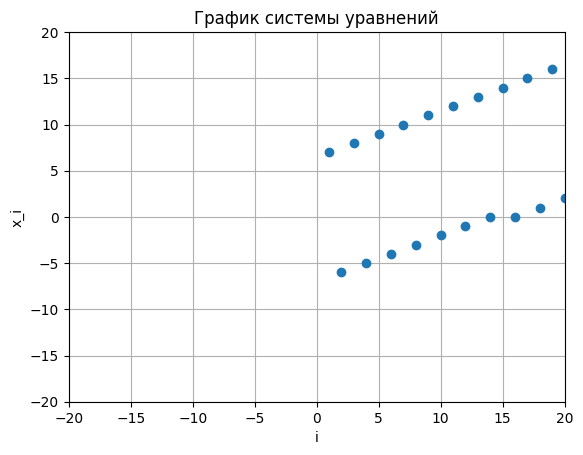

In [34]:
plt.title('График системы уравнений')
plt.xlabel('i') #индекс элемента x_i-го
plt.ylabel('x_i') #сам x_i-й
plt.grid(True)
plt.axis([-20, 20, -20, 20])

A = np.zeros((29, 29))
B = np.zeros(29)
for i in range(29):
    A[i][(i+1)%29] = 1 
    A[i][i%29] = 1 
    B[i] = i+1 
    
x = np.linalg.solve(A, B)


x = np.linalg.solve(A, k).astype(int)
for ind, el in enumerate(x):
    print(ind + 1, *el)

plt.plot(range(1, 30), x, 'o')


xi = {
    6 + i если i -- нечетное
    -7 + i/2 если i -- четное и i < 15
    (i-16)/2 если i -- четное и i > 15
}

## Задание 5

Проведите аналогичное исследование для семейства систем линейных уравнений при $3 \leq n \leq 30$
$$
\left\{\begin{matrix}
x_1 + x_2 + x_3= 1 \\
x_2 + x_3 + x_4= 2 \\
... \\
x_{n-2} + x_{n-1} + x_{n}= n-2 \\
x_{n-1} + x_{n} + x_{1}= n-1 \\
x_{n} + x_{1} + x_{2}= n \\
\end{matrix}\right.
$$

In [24]:
for n in range(3, 31):
    A = np.zeros((n,n))
    k = np.zeros((n,1))
    for i in range(n):
        A[i][i] = A[i][(i+1)%n] = A[i][(i+2)%n] = 1
        k[i] = i + 1
    if (np.linalg.det(A) != 0):
        print(f'Система имеет решение при n = {n}')
    else:
        print(f'Система не имеет решений прий n = {n}')        

Система не имеет решений прий n = 3
Система имеет решение при n = 4
Система имеет решение при n = 5
Система не имеет решений прий n = 6
Система имеет решение при n = 7
Система имеет решение при n = 8
Система не имеет решений прий n = 9
Система имеет решение при n = 10
Система имеет решение при n = 11
Система не имеет решений прий n = 12
Система имеет решение при n = 13
Система имеет решение при n = 14
Система не имеет решений прий n = 15
Система имеет решение при n = 16
Система имеет решение при n = 17
Система не имеет решений прий n = 18
Система имеет решение при n = 19
Система имеет решение при n = 20
Система не имеет решений прий n = 21
Система имеет решение при n = 22
Система имеет решение при n = 23
Система не имеет решений прий n = 24
Система имеет решение при n = 25
Система имеет решение при n = 26
Система не имеет решений прий n = 27
Система имеет решение при n = 28
Система имеет решение при n = 29
Система не имеет решений прий n = 30


1 0
2 10
3 -9
4 1
5 11
6 -8
7 2
8 12
9 -7
10 3
11 13
12 -6
13 4
14 14
15 -5
16 5
17 15
18 -4
19 6
20 16
21 -3
22 7
23 17
24 -2
25 8
26 18
27 -1
28 9
29 19


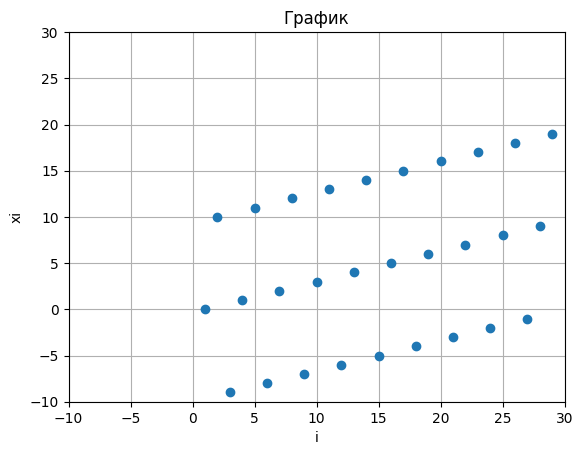

In [33]:
plt.title('График')
plt.xlabel('i') 
plt.ylabel('xi')
plt.grid(True)
plt.axis([-10, 30, -10, 30])

n = 29
A = np.zeros((n,n))
k = np.zeros((n,1))
for i in range(n):
    A[i][i] = A[i][(i+1)%n] = A[i][(i+2)%n] = 1
    k[i] = i + 1
    
x = np.linalg.solve(A, k).astype(int)
for ind, el in enumerate(x):
    print(ind + 1, *el)
plt.plot(range(1, 30), x, 'o')

#Тут примерно та же дичь, что и выше с формулой, но мне честно просто лень стало и так очень душные задания(((((((
#А так очевидно конечно


1. Система имеет решение при $n$ - ...
2. Максимальное значение $n$ ($3 \leq n \leq 30$), при котором система имеет решение равно ...

Данное решение имеет вид:
$$
x_i = 
\left\{\begin{matrix}
..., \mbox{ если $i$ - ... } \\
..., \mbox{ если $i$ - ...} 
\end{matrix}
\right.
$$